(lec5_live)=
# Lecture 5 live coding

**2025-02-18**

---

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from nhanes.load import load_NHANES_data

## Pandas reassignment

If we're chaining together operations, we need to be careful about which dataframe we're modifying.

Select respondents who:

- are adults AND
- report being in `Excellent` or `Very good` health

In [2]:
nhanes_df = load_NHANES_data()

sel_df = nhanes_df[nhanes_df['AgeInYearsAtScreening'] >= 18]
sel_df = nhanes_df[(nhanes_df['GeneralHealthCondition'] == 'Excellent') | (nhanes_df['GeneralHealthCondition'] == 'Very good')]


`.loc` operations can be in-place:

In [3]:
print(nhanes_df['SmokedAtLeast100CigarettesInLife'].value_counts())

#nhanes_df.loc[nhanes_df['GeneralHealthCondition'] == 'Excellent', 'SmokedAtLeast100CigarettesInLife'] = 0

SmokedAtLeast100CigarettesInLife
0.0    3301
1.0    2232
Name: count, dtype: int64


:::{tip}

- Restart the notebook and run from top-to-bottom to double check any reassignment issues.

- If the data are not too large, can re-run the cell to re-load the data.

:::

If there is a pandas operation that modifies portions of the dataframe, watch the `inplace` parameter!

- [fillna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)
- [replace()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [4]:
print(nhanes_df['SmokedAtLeast100CigarettesInLife'].isna().sum())

#nhanes_df.fillna(0)

#nhanes_df['GeneralHealthCondition'].replace({'Poor?': 'Poor', 'Fair or': 'Fair'})

2833


:::{tip}

To be safe, I generally recommend explicitly re-assigning the dataframe whenever you're modifying portions of it.

:::

## Bootstrap

### Using a collected sample as a substitute for the population

Bootstrap sampling "works" because we assume our collected sample is representative of the population.

Suppose we have a distribution of class colors:

$$X \sim \text{Categorical}(p)$$

Where $p=\{\frac{1}{4}, \frac{1}{4}, \frac{1}{4}, \frac{1}{4}\}$ is the probability of each class:

- Blue Lion
- Green Griffin
- Red Pegasus
- Yellow Sphinx

A sample of adequate size should be representative of the population.

In [5]:
rng = np.random.RandomState(42)

class_colors = ['Blue Lion', 'Green Griffin', 'Red Pegasus', 'Yellow Sphinx']
class_probs =  [        1/4,             1/4,           1/4,             1/4]

In [6]:
n_samples = 500

# class_sample = rng.choice(class_colors, size=n_samples, p=class_probs)
# pd.Series(class_sample).value_counts(normalize=True)

Yellow Sphinx    0.262
Blue Lion        0.260
Red Pegasus      0.256
Green Griffin    0.222
Name: proportion, dtype: float64

:::{tip}

As long as the proportions are about right, the sample is representative, regardless of the size!

:::

### Why we care about uncertainty $\to$ confidence intervals

In [7]:
n_samples = 100  
true_goose_weight = 10
goose_weights = rng.normal(loc=true_goose_weight, scale=2, size=n_samples)

In [8]:
def mean_estimator(sample):
    """
    An estimator of the expected value E[ ] of the population.

    Returns: 
        float: the mean of the sample
    """
    return np.mean(sample)


In [9]:
bootstrap_means = []
n_bootstraps = 5000

# for i in range(n_bootstraps):
#     # 1. draw a bootstrap sample
#     bootstrap_sample = rng.choice(goose_weights, size=100, replace=True)
#     bootstrap_sample
#     # 2. compute our mean again, with the bootstrap sample
#     bootstrap_mean = mean_estimator(bootstrap_sample)

#     # 3. add our bootstrap_mean to the list
#     bootstrap_means.append(bootstrap_mean)

Our estimate of average goose weight: 10.0 lbs
95% Confidence Interval: [9.6, 10.4] lbs


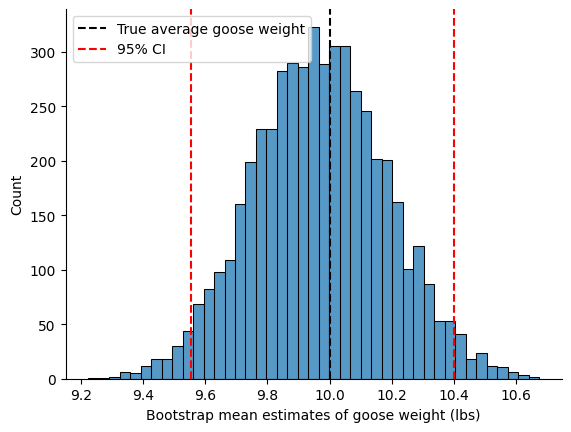

In [10]:

# lower_ci = np.percentile(bootstrap_means, 2.5)
# upper_ci = np.percentile(bootstrap_means, 97.5)

# print(f"Our estimate of average goose weight: {mean_estimator(goose_weights):.1f} lbs")
# print(f"95% Confidence Interval: [{lower_ci:.1f}, {upper_ci:.1f}] lbs")

# sns.histplot(bootstrap_means)
# plt.axvline(true_goose_weight, color='black', linestyle='--', label='True average goose weight')
# plt.axvline(lower_ci, color='red', linestyle='--')
# plt.axvline(upper_ci, color='red', linestyle='--', label='95% CI')
# plt.xlabel('Bootstrap mean estimates of goose weight (lbs)')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.legend()
#plt.show()
#plt.savefig('../lectures/s25/slidev/assets/lec05_bootstrap_mean_ci.png', transparent=True, dpi=300)



In [15]:

n_bootstraps = 1000
n_intervals = 500

count_missed = 0

# for j in range(n_intervals):
#     # First draw a new sample from the true distribution
#     goose_sample = rng.normal(loc=true_goose_weight, scale=2, size=100)
    
#     bootstrap_means = []
#     for i in range(n_bootstraps):
#         # Draw bootstrap samples from this sample
#         bootstrap_sample = rng.choice(goose_sample, size=100, replace=True)
#         bootstrap_mean = mean_estimator(bootstrap_sample)
#         bootstrap_means.append(bootstrap_mean)

#     # Compute CI for this sample
#     lower_ci = np.percentile(bootstrap_means, 2.5)
#     upper_ci = np.percentile(bootstrap_means, 97.5)

#     if true_goose_weight < lower_ci or true_goose_weight > upper_ci:
#         count_missed += 1

# print(f"Number of intervals that missed the true mean: {count_missed}")
# print(f"Proportion of intervals that missed the true mean: {count_missed / n_intervals:.3f}")

Number of intervals that missed the true mean: 37
Proportion of intervals that missed the true mean: 0.053


### Why we care about uncertainty $\to$ comparing estimators

In [37]:
def first_ten_estimator(sample):
    """
    A (not very good) estimator of the expected value E[ ] of the population.

    Returns: 
        float: the mean of the first 10 elements of the sample
    """
    return np.mean(sample[:10])

In [38]:
bootstrap_means = []
bootstrap_first_tens = []
n_bootstraps = 5000

# for i in range(n_bootstraps):
#     # 1. draw a bootstrap sample
#     bootstrap_sample = rng.choice(goose_weights, size=100, replace=True)
#     bootstrap_sample
    
#     # 2. compute our estimates, with the bootstrap sample
#     bootstrap_mean = mean_estimator(bootstrap_sample)
#     bootstrap_first_ten = first_ten_estimator(bootstrap_sample)
    
#     # 3. add our bootstrap_mean to the list
#     bootstrap_means.append(bootstrap_mean)
#     bootstrap_first_tens.append(bootstrap_first_ten)

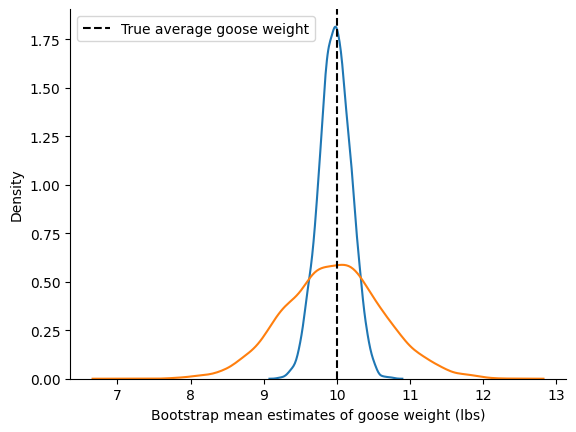

In [43]:
# sns.kdeplot(bootstrap_means)#, label="Mean of whole sample")
# sns.kdeplot(bootstrap_first_tens)#, label="Mean of first 10")
# plt.axvline(true_goose_weight, color='black', linestyle='--', label='True average goose weight')
# plt.xlabel('Bootstrap mean estimates of goose weight (lbs)')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.legend()
#plt.show()
